## Resolução de exercicios base olist - nível médio ##

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customer = pd.read_csv("Datasets/olist_customers_dataset.csv")
geolocation = pd.read_csv("Datasets/olist_geolocation_dataset.csv")
order_items = pd.read_csv("Datasets/olist_order_items_dataset.csv")
order_payments = pd.read_csv("Datasets/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("Datasets/olist_order_reviews_dataset.csv")
orders = pd.read_csv("Datasets/olist_orders_dataset.csv")
products = pd.read_csv("Datasets/olist_products_dataset.csv")
sellers = pd.read_csv("Datasets/olist_sellers_dataset.csv")

In [4]:
# 1 Existem outliers e valores nulos, de forma geral, nas bases. Quais seriam as explicações plausíveis? Escolha um dataset e explique

#orders.shape
orders.isna().sum()
#orders.isna().sum() / shape

#Coluna order approved at
    # Coluna approved at tem valores vazios para status 'canceled', 'delivered', 'created'. Para os status 'canceled' e created faz sentido, mas para itens entregues não, parece ser um erro de sistema. O percentual é muito baixo
        #orders[orders['order_approved_at'].isna()]
        #orders[orders['order_approved_at'].isna()].order_status.unique()
        #orders[orders['order_approved_at'].isna()].order_status.value_counts()


#orders[orders['order_delivered_customer_date'].isna()]
#orders[orders['order_delivered_customer_date'].isnull()]
#orders[orders['order_status']=='unavailable']
#orders[(orders['order_status']=='unavailable') & (orders['order_delivered_customer_date'].isna())]

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

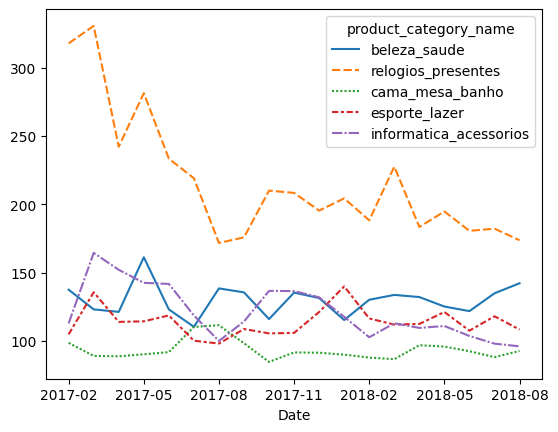

In [16]:
# 2. O preço dos produtos está em tendência de subida ou descida ao longo do tempo?

# Na tabela de ordem tem a data da compra 
# Na tabela order items tem o preço 
# Na tabela products tem a categoria 

# 1 - Left join order items com products para pegar a categoria 
    #order_id, product_id, price/ category   

# 2 - Left join resultado do primeiro merge com tabela de ordem para buscar a data de compra 

    #order_id, product_id, price, category / date
    # Columns: 'order_id','order_purchase_timestamp','Date','Month','Year','product_id','price','product_category_name'


#beleza_saude              1258681.34
#relogios_presentes        1205005.68
#cama_mesa_banho           1036988.68
#esporte_lazer              988048.97
#informatica_acessorios     911954.32

#query("product_category_name == ['beleza_saude', 'relogios_presentes','cama_mesa_banho','esporte_lazer','informatica_acessorios']")

first_join = order_items.merge(products, on="product_id", how = "left")
#first_join[['order_id','product_id','price','product_category_name']]
second_join = first_join.merge(orders, on='order_id', how = 'left')
second_join['Date'] =  pd.to_datetime(second_join['order_purchase_timestamp']).dt.strftime('%Y-%m')
df = second_join.pivot_table(values='price', index='Date', columns='product_category_name', aggfunc='mean',fill_value=0)
selected = df[['beleza_saude','relogios_presentes','cama_mesa_banho','esporte_lazer','informatica_acessorios']].query("Date != ['2016-09', '2016-10','2017-01','2016-12','2018-09']")

fig = sns.lineplot(data=selected)
plt.xticks(['2017-02','2017-05','2017-08','2017-11','2018-02','2018-05','2018-08'])
plt.show(fig)